In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# San Jose Crash 2011-2020 data

In [4]:
# https://data.sanjoseca.gov/dataset/918fb7f0-60c0-484e-b31c-334d1ec74e92/resource/c19a01f2-33e1-4c66-9498-85d489f90da4/download/crashdata2011-2020.csv
#df = pd.read_csv("https://raw.githubusercontent.com/jaymonty/datasets/main/crashdata2011-2020.csv")

# data URL https://data.sanjoseca.gov/dataset/crashes-data/resource/c19a01f2-33e1-4c66-9498-85d489f90da4

df = pd.read_csv("https://data.sanjoseca.gov/dataset/918fb7f0-60c0-484e-b31c-334d1ec74e92/resource/c19a01f2-33e1-4c66-9498-85d489f90da4/download/crashdata2011-2020.csv")

In [5]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [6]:
df.columns

Index(['CrashFactId', 'Name', 'MinorInjuries', 'ModerateInjuries',
       'SevereInjuries', 'FatalInjuries', 'TcrNumber', 'CityDamageFlag',
       'ShortFormFlag', 'Distance', 'CrashDateTime', 'PedestrianAction',
       'RoadwaySurface', 'RoadwayCondition', 'Lighting',
       'PrimaryCollisionFactor', 'TrafficControl', 'Weather', 'CollisionType',
       'ProximityToIntersection', 'VehicleInvolvedWith',
       'PedestrianDirectionFrom', 'PedestrianDirectionTo',
       'DirectionFromIntersection', 'Comment'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(56044, 25)

In [9]:
df.columns

Index(['CrashFactId', 'Name', 'MinorInjuries', 'ModerateInjuries',
       'SevereInjuries', 'FatalInjuries', 'TcrNumber', 'CityDamageFlag',
       'ShortFormFlag', 'Distance', 'CrashDateTime', 'PedestrianAction',
       'RoadwaySurface', 'RoadwayCondition', 'Lighting',
       'PrimaryCollisionFactor', 'TrafficControl', 'Weather', 'CollisionType',
       'ProximityToIntersection', 'VehicleInvolvedWith',
       'PedestrianDirectionFrom', 'PedestrianDirectionTo',
       'DirectionFromIntersection', 'Comment'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56044 entries, 0 to 56043
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CrashFactId                56044 non-null  int64  
 1   Name                       56044 non-null  object 
 2   MinorInjuries              56044 non-null  int64  
 3   ModerateInjuries           56044 non-null  int64  
 4   SevereInjuries             56044 non-null  int64  
 5   FatalInjuries              56044 non-null  int64  
 6   TcrNumber                  56044 non-null  object 
 7   CityDamageFlag             56044 non-null  bool   
 8   ShortFormFlag              56044 non-null  bool   
 9   Distance                   55461 non-null  float64
 10  CrashDateTime              56044 non-null  object 
 11  PedestrianAction           56044 non-null  object 
 12  RoadwaySurface             56044 non-null  object 
 13  RoadwayCondition           56044 non-null  obj

In [11]:
df.describe()

,CrashFactId,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance
count,56044.000000,56044.000000,56044.000000,56044.000000,56044.000000,55461.000000
mean,636551.058561,0.389355,0.142745,0.031368,0.008244,82.821676
std,25178.436452,0.696574,0.395495,0.189516,0.094094,237.568783
min,591079.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,614554.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,639772.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,658137.250000,1.000000,0.000000,0.000000,0.000000,87.000000
max,676829.000000,8.000000,10.000000,5.000000,3.000000,8448.000000


In [12]:
#checking for incosistency
df['CrashFactId'].unique()

array([591079, 591080, 591081, ..., 676826, 676828, 676829])

In [13]:
missing_vals = df.isna().sum()/len(df)*100

In [14]:
missing_vals = missing_vals[missing_vals > 0]
print('Percentage of Missing Values:')
print(missing_vals)

Percentage of Missing Values:
Distance     1.040254
Comment     93.034045
dtype: float64


In [15]:
df.head(5)

,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,CityDamageFlag,ShortFormFlag,Distance,...,PrimaryCollisionFactor,TrafficControl,Weather,CollisionType,ProximityToIntersection,VehicleInvolvedWith,PedestrianDirectionFrom,PedestrianDirectionTo,DirectionFromIntersection,Comment
0,591079,CR-0000071607,0,0,0,0,18-073-0962,True,False,228.0,...,Violation Driver 1,No Controls Present/Factor,Clear,Hit Object,Non-Related,Fixed Object,Not Applicable,Not Applicable,East Of,V1 HIT CEMENT GUARD RAIL
1,591080,CR-0000071780,0,0,0,0,18-060-0123,True,False,148.0,...,Violation Driver 1,No Controls Present/Factor,Rain,Hit Object,Non-Related,Fixed Object,Not Applicable,Not Applicable,West Of,v1 hit city pole
2,591081,CR-0000060418,0,0,0,0,16-033-0204,False,False,1583.0,...,Violation Driver 1,No Controls Present/Factor,Rain,Overturned,Non-Related,Fixed Object,Not Applicable,Not Applicable,South Of,NaN
3,591082,CR-0000060410,0,1,0,0,16-041-0882,False,False,295.0,...,Violation Driver 1,No Controls Present/Factor,Clear,Head On,Non-Related,Fixed Object,Not Applicable,Not Applicable,East Of,NaN
4,591083,CR-0000060514,2,0,0,0,16-063-0761,False,False,0.0,...,Violation Driver 1,No Controls Present/Factor,Cloudy,Vehicle/Pedestrian,Intersection,Pedestrian,South,North,At,NaN


In [16]:
df['CrashDateTime'].head(10)

0     3/14/2018 23:17
1       3/1/2018 7:30
2       2/2/2016 9:02
3     2/10/2016 20:33
4      3/3/2016 19:04
5      5/6/2018 18:58
6     5/25/2017 18:43
7     2/26/2013 21:30
8    12/19/2014 21:50
9     2/23/2013 18:59
Name: CrashDateTime, dtype: object

In [17]:
# Index data based on time
df.index = pd.to_datetime(df['CrashDateTime'])
df = df.sort_index()

# "Name" is same as "CrashName" for other dataset
#df = df.sort_values(by=['Name'])

In [18]:
df['CrashDateTime'].head(5)

CrashDateTime
2011-01-01 00:09:00    1/1/2011 0:09
2011-01-01 02:03:00    1/1/2011 2:03
2011-01-01 02:08:00    1/1/2011 2:08
2011-01-01 02:19:00    1/1/2011 2:19
2011-01-01 02:33:00    1/1/2011 2:33
Name: CrashDateTime, dtype: object

In [19]:
df.head(5)

,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,CityDamageFlag,ShortFormFlag,Distance,...,PrimaryCollisionFactor,TrafficControl,Weather,CollisionType,ProximityToIntersection,VehicleInvolvedWith,PedestrianDirectionFrom,PedestrianDirectionTo,DirectionFromIntersection,Comment
CrashDateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:09:00,609603,CR-0000028982,0,0,0,0,11-001-0016,False,False,0.0,...,Unknown,No Controls Present/Factor,Cloudy,Other,Non-Related,Parked Vehicle,Not Applicable,Not Applicable,West Of,NaN
2011-01-01 02:03:00,609753,CR-0000028996,0,0,0,0,11-001-0235,False,False,0.0,...,Unknown,No Controls Present/Factor,Rain,Other,Non-Related,Parked Vehicle,Not Applicable,Not Applicable,South Of,NaN
2011-01-01 02:08:00,609238,CR-0000028995,0,0,1,0,11-001-0243,False,False,0.0,...,Unknown,No Controls Present/Factor,Rain,Other,Non-Related,Pedestrian,East,West,North Of,NaN
2011-01-01 02:19:00,631860,CR-0000028979,0,0,0,0,11-001-0256,False,False,0.0,...,Unknown,No Controls Present/Factor,Rain,Other,Non-Related,Parked Vehicle,Not Applicable,Not Applicable,South Of,NaN
2011-01-01 02:33:00,674060,CR-0000028994,0,0,0,0,11-001-0275,False,False,0.0,...,Unknown,Controls Functioning,Rain,Other,Non-Related,Fixed Object,Not Applicable,Not Applicable,West Of,NaN


In [20]:
df['MinorInjuries'].value_counts()

0    39436
1    12668
2     2995
3      703
4      181
5       43
6       13
7        3
8        2
Name: MinorInjuries, dtype: int64

In [21]:
len(df['Name'])-len(df['Name'].drop_duplicates())

0

In [22]:
df['Weather'].value_counts()

Clear      46526
Cloudy      4555
Rain        3617
Unknown     1057
Other        115
Fog           90
Wind          79
Snow           5
Name: Weather, dtype: int64

### Group each injury category into one group, and drop zero value because we're counting these values twice

In [23]:
# This will group all minor injuries into one group, and non-minor injuries into one group
# MinorInjuries is basically binary now

minor = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}

df.MinorInjuries = [minor[item] for item in df.MinorInjuries]

In [24]:
# Minor Injuries = 16608 total
min_sum = df['MinorInjuries'].value_counts().sum()
df['MinorInjuries'].value_counts()

0    39436
1    16608
Name: MinorInjuries, dtype: int64

In [25]:
# ModerateInjuries combined into two variables (like Minor)
moderate = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6:1, 7: 1, 8: 1, 9: 1, 10: 1}

df.ModerateInjuries = [moderate[item] for item in df.ModerateInjuries]

In [26]:
# Moderate Injuries = 7267 total
mod_sum = df['ModerateInjuries'].value_counts().sum()
df['ModerateInjuries'].value_counts()

0    48777
1     7267
Name: ModerateInjuries, dtype: int64

In [27]:
# SevereInjuries combined into two variables (like Minor)
sev = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6:1, 7: 1, 8: 1, 9: 1, 10: 1}

df.SevereInjuries = [sev[item] for item in df.SevereInjuries]

In [28]:
# Severe Injuries = 1633 total
sev_sum = df['SevereInjuries'].value_counts().sum()
df['SevereInjuries'].value_counts()
# print(sev_sum)

0    54411
1     1633
Name: SevereInjuries, dtype: int64

In [29]:
# FatalInjuries combined into two variables (like Minor)

fatal = {0: 0, 1: 1, 2: 1, 3: 1}

df.FatalInjuries = [fatal[item] for item in df.FatalInjuries]

In [30]:
# Fatal Injuries = 444
fat_sum = df['FatalInjuries'].value_counts().sum()
df['FatalInjuries'].value_counts()
#print(fat_sum)

0    55600
1      444
Name: FatalInjuries, dtype: int64

In [31]:
total = min_sum + mod_sum + sev_sum + fat_sum
total

# This total doesn't make sense, until you look at value_counts() and see what's in place for the "0" position. Things are being counted more than once.
# Total = 224,176

224176

In [32]:
# Total injury count is actually = 25,952 | Non-Injury 30,092

In [33]:
df['CityDamageFlag'].value_counts()

False    50650
True      5394
Name: CityDamageFlag, dtype: int64

In [34]:
# IQR
Q1 = np.percentile(df['Distance'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['Distance'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

upper = df['Distance'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
#print(np.where(upper))
 
# Below Lower bound
lower = df['Distance'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
#print(np.where(lower))

Streaming output truncated to the last 5000 lines.
2019-10-18 20:39:00    False
2019-10-18 22:05:00    False
2019-10-18 22:59:00    False
2019-10-18 23:52:00    False
2019-10-19 02:00:00    False
2019-10-19 09:00:00    False
2019-10-19 09:57:00    False
2019-10-19 11:13:00    False
2019-10-19 11:54:00    False
2019-10-19 12:34:00    False
2019-10-19 13:03:00    False
2019-10-19 15:30:00    False
2019-10-19 15:35:00    False
2019-10-19 15:55:00    False
2019-10-19 16:15:00    False
2019-10-19 18:20:00    False
2019-10-19 19:42:00    False
2019-10-19 21:10:00    False
2019-10-19 21:40:00    False
2019-10-19 22:25:00    False
2019-10-19 22:40:00    False
2019-10-19 23:59:00    False
2019-10-20 00:02:00    False
2019-10-20 02:40:00    False
2019-10-20 04:00:00    False
2019-10-20 05:15:00    False
2019-10-20 06:45:00    False
2019-10-20 06:49:00    False
2019-10-20 09:04:00    False
2019-10-20 11:30:00    False
2019-10-20 12:12:00    False
2019-10-20 15:34:00    False
2019-10-20 15:35:00  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


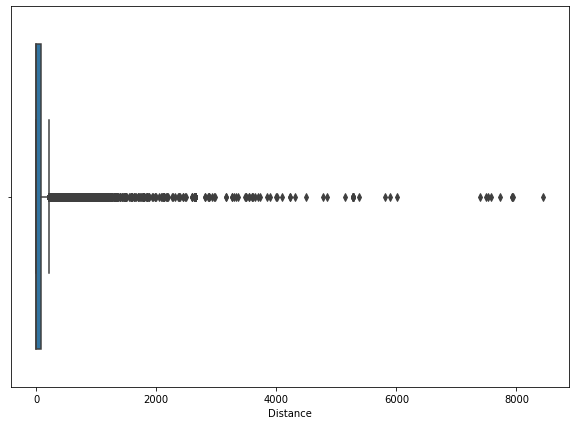

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(df.Distance);
plt.show()

In [36]:
df.Distance.value_counts()

0.0       30388
51.0       1570
100.0       766
50.0        660
30.0        626
200.0       517
20.0        512
150.0       501
60.0        474
300.0       433
40.0        365
75.0        351
45.0        314
15.0        314
120.0       284
25.0        277
90.0        277
80.0        239
10.0        237
70.0        222
250.0       205
35.0        195
36.0        186
18.0        168
180.0       167
500.0       158
24.0        154
33.0        151
48.0        148
65.0        147
130.0       146
21.0        146
140.0       141
55.0        139
105.0       139
110.0       130
400.0       127
42.0        127
27.0        127
125.0       117
12.0        116
160.0       115
85.0        111
170.0       107
66.0        105
54.0        104
72.0        102
32.0         98
210.0        97
220.0        96
95.0         96
39.0         94
350.0        94
26.0         93
240.0        92
28.0         91
135.0        91
78.0         89
57.0         86
115.0        85
22.0         84
175.0        84
145.0   

In [37]:
df['CrashDateTime'].unique()

array(['1/1/2011 0:09', '1/1/2011 2:03', '1/1/2011 2:08', ...,
       '12/31/2020 18:00', '12/31/2020 21:09', '12/31/2020 23:16'],
      dtype=object)

In [38]:
# split  CrashDateTime into date and time, add new columns to df
df[['CrashDate', 'CrashTime']] = df['CrashDateTime'].str.split(' ', expand=True)

In [39]:
#df['CrashDate'].head(10)

In [40]:

df=df.drop(columns=['CrashDateTime','Comment'])

In [41]:
df.columns

Index(['CrashFactId', 'Name', 'MinorInjuries', 'ModerateInjuries',
       'SevereInjuries', 'FatalInjuries', 'TcrNumber', 'CityDamageFlag',
       'ShortFormFlag', 'Distance', 'PedestrianAction', 'RoadwaySurface',
       'RoadwayCondition', 'Lighting', 'PrimaryCollisionFactor',
       'TrafficControl', 'Weather', 'CollisionType', 'ProximityToIntersection',
       'VehicleInvolvedWith', 'PedestrianDirectionFrom',
       'PedestrianDirectionTo', 'DirectionFromIntersection', 'CrashDate',
       'CrashTime'],
      dtype='object')

In [42]:
#df['CrashDate'].head(-5)

In [43]:
df_One_Hot = df.copy()

In [44]:
df_One_Hot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56044 entries, 2011-01-01 00:09:00 to 2020-12-31 23:16:00
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CrashFactId                56044 non-null  int64  
 1   Name                       56044 non-null  object 
 2   MinorInjuries              56044 non-null  int64  
 3   ModerateInjuries           56044 non-null  int64  
 4   SevereInjuries             56044 non-null  int64  
 5   FatalInjuries              56044 non-null  int64  
 6   TcrNumber                  56044 non-null  object 
 7   CityDamageFlag             56044 non-null  bool   
 8   ShortFormFlag              56044 non-null  bool   
 9   Distance                   55461 non-null  float64
 10  PedestrianAction           56044 non-null  object 
 11  RoadwaySurface             56044 non-null  object 
 12  RoadwayCondition           56044 non-null  object 
 13  Lighting   

In [45]:
df_One_Hot=df_One_Hot.drop(columns=['Name','TcrNumber','CrashFactId', 'MinorInjuries', 'ModerateInjuries', 'SevereInjuries','FatalInjuries','CrashDate','CrashTime','Distance'])

In [46]:
#count of labels in each feature
for col in df_One_Hot.columns:
  print(col, ':',len(df_One_Hot[col].unique()), 'Labels')


CityDamageFlag : 2 Labels
ShortFormFlag : 2 Labels
PedestrianAction : 11 Labels
RoadwaySurface : 5 Labels
RoadwayCondition : 9 Labels
Lighting : 6 Labels
PrimaryCollisionFactor : 9 Labels
TrafficControl : 5 Labels
Weather : 8 Labels
CollisionType : 9 Labels
ProximityToIntersection : 4 Labels
VehicleInvolvedWith : 18 Labels
PedestrianDirectionFrom : 11 Labels
PedestrianDirectionTo : 11 Labels
DirectionFromIntersection : 6 Labels


In [47]:
df_One_Hot.columns

Index(['CityDamageFlag', 'ShortFormFlag', 'PedestrianAction', 'RoadwaySurface',
       'RoadwayCondition', 'Lighting', 'PrimaryCollisionFactor',
       'TrafficControl', 'Weather', 'CollisionType', 'ProximityToIntersection',
       'VehicleInvolvedWith', 'PedestrianDirectionFrom',
       'PedestrianDirectionTo', 'DirectionFromIntersection'],
      dtype='object')

In [48]:
# dimension of dataframe after one hot encdoing 
pd.get_dummies(df_One_Hot, drop_first=True).shape

(56044, 101)

In [49]:
ohe = OneHotEncoder(categories='auto')

feature_arr = ohe.fit_transform(df_One_Hot).toarray()

ohe_labels = ohe.get_feature_names(df_One_Hot.columns)

df_One_Hot = pd.DataFrame(feature_arr,columns=ohe_labels)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
df_One_Hot.head()
print(type(df_One_Hot))

<class 'pandas.core.frame.DataFrame'>


In [51]:
df_One_Hot.head()
print(type(df_One_Hot))

<class 'pandas.core.frame.DataFrame'>


In [52]:
df_One_Hot = df_One_Hot.loc[:,~df_One_Hot.columns.duplicated()].reset_index(drop=True)

In [53]:
df = df.loc[:,~df.columns.duplicated()].reset_index(drop=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56044 entries, 0 to 56043
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CrashFactId                56044 non-null  int64  
 1   Name                       56044 non-null  object 
 2   MinorInjuries              56044 non-null  int64  
 3   ModerateInjuries           56044 non-null  int64  
 4   SevereInjuries             56044 non-null  int64  
 5   FatalInjuries              56044 non-null  int64  
 6   TcrNumber                  56044 non-null  object 
 7   CityDamageFlag             56044 non-null  bool   
 8   ShortFormFlag              56044 non-null  bool   
 9   Distance                   55461 non-null  float64
 10  PedestrianAction           56044 non-null  object 
 11  RoadwaySurface             56044 non-null  object 
 12  RoadwayCondition           56044 non-null  object 
 13  Lighting                   56044 non-null  obj

In [55]:
Final_df = pd.concat([df, df_One_Hot], axis=1)
print(type(list(Final_df.columns)))
columns_names = sorted(list(Final_df.columns))
for colName in columns_names:
  print(colName)

<class 'list'>
CityDamageFlag
CityDamageFlag_False
CityDamageFlag_True
CollisionType
CollisionType_Broadside
CollisionType_Head On
CollisionType_Hit Object
CollisionType_Other
CollisionType_Overturned
CollisionType_Rear End
CollisionType_Sideswipe
CollisionType_Vehicle/Bike
CollisionType_Vehicle/Pedestrian
CrashDate
CrashFactId
CrashTime
DirectionFromIntersection
DirectionFromIntersection_At
DirectionFromIntersection_East Of
DirectionFromIntersection_North Of
DirectionFromIntersection_South Of
DirectionFromIntersection_Unknown
DirectionFromIntersection_West Of
Distance
FatalInjuries
Lighting
Lighting_Dark - No Street Light
Lighting_Dark - Street Light
Lighting_Dark - Street Light Not Functioning
Lighting_Daylight
Lighting_Dusk - Dawn
Lighting_Unknown
MinorInjuries
ModerateInjuries
Name
PedestrianAction
PedestrianAction_Approaching/Leaving School Bus
PedestrianAction_Crossing - Not In Crosswalk
PedestrianAction_Crossing In Crosswalk - At Intersection
PedestrianAction_Crossing In Crosswa

In [56]:
Final_df.shape

(56044, 141)

In [57]:
Final_df=Final_df.drop(columns=['CityDamageFlag', 'ShortFormFlag', 'PedestrianAction', 'RoadwaySurface',
       'RoadwayCondition', 'Lighting', 'PrimaryCollisionFactor',
       'TrafficControl', 'Weather', 'CollisionType', 'ProximityToIntersection',
       'VehicleInvolvedWith', 'PedestrianDirectionFrom',
       'PedestrianDirectionTo', 'DirectionFromIntersection'])

In [58]:
Final_df.columns

Index(['CrashFactId', 'Name', 'MinorInjuries', 'ModerateInjuries',
       'SevereInjuries', 'FatalInjuries', 'TcrNumber', 'Distance', 'CrashDate',
       'CrashTime',
       ...
       'PedestrianDirectionTo_Southeast', 'PedestrianDirectionTo_Southwest',
       'PedestrianDirectionTo_Unknown', 'PedestrianDirectionTo_West',
       'DirectionFromIntersection_At', 'DirectionFromIntersection_East Of',
       'DirectionFromIntersection_North Of',
       'DirectionFromIntersection_South Of',
       'DirectionFromIntersection_Unknown',
       'DirectionFromIntersection_West Of'],
      dtype='object', length=126)

In [84]:
missing_vals2 = Final_df.isna().sum()/len(Final_df)*100
missing_vals2

CrashFactId                                                     0.0
Name                                                            0.0
MinorInjuries                                                   0.0
ModerateInjuries                                                0.0
SevereInjuries                                                  0.0
FatalInjuries                                                   0.0
TcrNumber                                                       0.0
Distance                                                        0.0
CrashDate                                                       0.0
CrashTime                                                       0.0
CityDamageFlag_False                                            0.0
CityDamageFlag_True                                             0.0
ShortFormFlag_False                                             0.0
ShortFormFlag_True                                              0.0
PedestrianAction_Approaching/Leaving School Bus 

In [85]:
#performed normalisation for distance feature
print('Distance')
print(Final_df['Distance'].value_counts(normalize=True))
print()
print(Final_df['Distance'].value_counts())

Distance
0.000000      0.612575
51.000000     0.031649
100.000000    0.015441
50.000000     0.013305
30.000000     0.012619
82.821676     0.011752
200.000000    0.010422
20.000000     0.010321
150.000000    0.010099
60.000000     0.009555
40.000000     0.007358
75.000000     0.007076
15.000000     0.006330
45.000000     0.006330
120.000000    0.005725
25.000000     0.005584
90.000000     0.005584
80.000000     0.004818
10.000000     0.004778
70.000000     0.004475
35.000000     0.003931
36.000000     0.003749
18.000000     0.003387
180.000000    0.003366
24.000000     0.003104
33.000000     0.003044
48.000000     0.002983
65.000000     0.002963
21.000000     0.002943
130.000000    0.002943
140.000000    0.002842
55.000000     0.002802
105.000000    0.002802
110.000000    0.002621
27.000000     0.002560
42.000000     0.002560
125.000000    0.002359
12.000000     0.002338
160.000000    0.002318
85.000000     0.002238
170.000000    0.002157
66.000000     0.002117
54.000000     0.002096
72

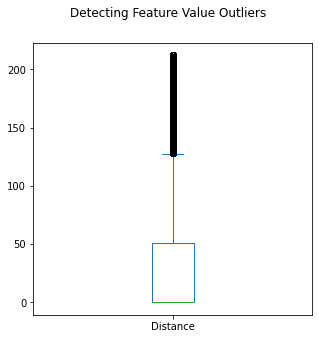

In [86]:
#box plot before removing outliers
fig, axes = plt.subplots(1, 1, figsize=(5,5))
fig.suptitle('Detecting Feature Value Outliers')
#Visualize the Distance
Final_df['Distance'].plot(kind="box")

In [87]:
#Imputing median_ppsf with its Mean
Final_df['Distance'].fillna(Final_df['Distance'].mean(), inplace = True)
distance_df = Final_df['Distance']

In [88]:
import sys
import math
import json

count = 1;
min_distance = sys.maxsize
max_distance = -1
print(min_distance)
for key, value in distance_df.iteritems():
    if value < min_distance:
      min_distance = value

    if value > max_distance:
      max_distance = value


number_of_buckets = math.ceil((int)(max_distance / 500)) + 1
print(min_distance)
print(max_distance)
print(number_of_buckets)    

dict = {}
for i in range(number_of_buckets):
  lower_bucket = i*500
  upper_bucket = (i+1)*500
  dict_key = str(lower_bucket) + "-"+ str(upper_bucket)
  dict[dict_key] = 0

for key, value in distance_df.iteritems():
  #print(value)
  lower_bound = int(round(value, -2))
  upper_bound = lower_bound + 500
  dict_key = str(lower_bound) + "-"+ str(upper_bound)
  if dict_key in dict:
    dict[dict_key] = dict[dict_key] + 1
  else:
    dict[dict_key] = 0

binning_dict = {}
binning_dict["0"] = 0
binning_dict["1"] = 0
for key, value in distance_df.iteritems():
  if value > 0:
    binning_dict["1"] = binning_dict["1"] + 1
  else:
    binning_dict["0"] = binning_dict["0"] + 1

print(binning_dict)

# print(json.dumps(dict, indent=4))

9223372036854775807
0.0
212.0
1
{'0': 30388, '1': 19219}


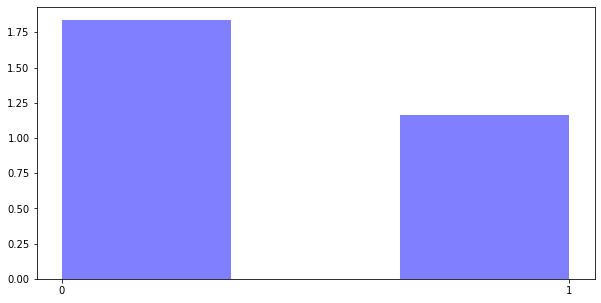

In [89]:
fig=plt.figure(figsize=(10,5))

mylist = [key for key, val in binning_dict.items() for _ in range(val)]
plt.hist(mylist, bins=3, density=True, alpha=0.5, color='b')
  
plt.show()

In [90]:
Q1 = Final_df['Distance'].quantile(0.25)
Q3 = Final_df['Distance'].quantile(0.75)
IQR = Q3 - Q1

Final_df = Final_df[~((Final_df['Distance'] < (Q1 - 1.5 * IQR)) |(Final_df['Distance'] > (Q3 + 1.5* IQR)))]

In [91]:
Final_df.shape

(45427, 126)

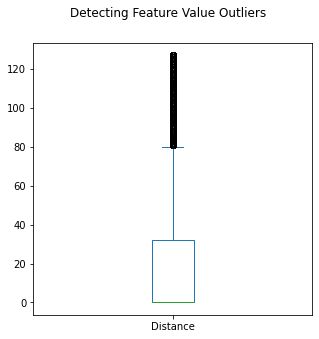

In [92]:
#box plot After removing outliers
fig, axes = plt.subplots(1, 1, figsize=(5,5))
fig.suptitle('Detecting Feature Value Outliers')
#Visualize the Distance
Final_df['Distance'].plot(kind="box")

In [95]:
missing_vals2 = Final_df['Distance'].isna().sum()/len(Final_df['Distance'])*100
missing_vals2

0.0

In [96]:
#Imputing Distance with its Mean
Final_df['Distance'].fillna(Final_df['Distance'].mean(), inplace = True)

In [97]:
Final_df.shape

(45427, 126)

In [98]:
pd.set_option('display.max_columns', 1000)  

Final_df.head()

,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,Distance,CrashDate,CrashTime,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Approaching/Leaving School Bus,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_Crossing In Crosswalk - At Intersection,PedestrianAction_Crossing In Crosswalk - Not At Intersection,PedestrianAction_In Road - Includes Shoulder,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,PedestrianAction_Other,PedestrianAction_Running/Jogging,PedestrianAction_Unknown,PedestrianAction_Walking,RoadwaySurface_Dry,RoadwaySurface_Slippery (Muddy Oily etc.),RoadwaySurface_Snowy - Icy,RoadwaySurface_Unknown,RoadwaySurface_Wet,RoadwayCondition_Construction - Repair Zone,RoadwayCondition_Flooded,RoadwayCondition_Holes Deep Rut,RoadwayCondition_Loose Material On Roadway,RoadwayCondition_No Unusual Conditions,RoadwayCondition_Obstruction On Roadway,RoadwayCondition_Other,RoadwayCondition_Reduced Roadway Width,RoadwayCondition_Unknown,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,Lighting_Dusk - Dawn,Lighting_Unknown,PrimaryCollisionFactor_Bike At Fault,PrimaryCollisionFactor_Fell Asleep,PrimaryCollisionFactor_Other Improper Driving,PrimaryCollisionFactor_Other Than Driver,PrimaryCollisionFactor_Parked/Rolling,PrimaryCollisionFactor_Pedestrian At Fault,PrimaryCollisionFactor_Unknown,PrimaryCollisionFactor_Violation Driver 1,PrimaryCollisionFactor_Violation Driver 2,TrafficControl_Controls Functioning,TrafficControl_Controls Not Functioning,TrafficControl_Controls Obscured,TrafficControl_No Controls Present/Factor,TrafficControl_Unknown,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Other,Weather_Rain,Weather_Snow,Weather_Unknown,Weather_Wind,CollisionType_Broadside,CollisionType_Head On,CollisionType_Hit Object,CollisionType_Other,CollisionType_Overturned,CollisionType_Rear End,CollisionType_Sideswipe,CollisionType_Vehicle/Bike,CollisionType_Vehicle/Pedestrian,ProximityToIntersection_Driveway,ProximityToIntersection_Intersection,ProximityToIntersection_Non-Related,ProximityToIntersection_Related,VehicleInvolvedWith_Animal,VehicleInvolvedWith_Bike,VehicleInvolvedWith_Fixed Object,VehicleInvolvedWith_Ice Cream Truck,VehicleInvolvedWith_Light Rail Vehicle,VehicleInvolvedWith_Motor Vehicle On Other Roadway,VehicleInvolvedWith_Motorcycle,VehicleInvolvedWith_Non-Collision,VehicleInvolvedWith_Other Object,VehicleInvolvedWith_Other Vehicle,VehicleInvolvedWith_Parked Vehicle,VehicleInvolvedWith_Pedestrian,VehicleInvolvedWith_Scooter Motorized,VehicleInvolvedWith_Scooter Non-Motorized,VehicleInvolvedWith_Skateboard,VehicleInvolvedWith_Train,VehicleInvolvedWith_Unknown,VehicleInvolvedWith_Wheelchair,PedestrianDirectionFrom_East,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_North,PedestrianDirectionFrom_Northeast,PedestrianDirectionFrom_Northwest,PedestrianDirectionFrom_Not Applicable,PedestrianDirectionFrom_South,PedestrianDirectionFrom_Southeast,PedestrianDirectionFrom_Southwest,PedestrianDirectionFrom_Unknown,PedestrianDirectionFrom_West,PedestrianDirectionTo_East,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_North,PedestrianDirectionTo_Northeast,PedestrianDirectionTo_Northwest,PedestrianDirectionTo_Not Applicable,PedestrianDirectionTo_South,PedestrianDirectionTo_Southeast,PedestrianDirectionTo_Southwest,PedestrianDirectionTo_Unknown,PedestrianDirectionTo_West,DirectionFromIntersection_At,DirectionFromIntersection_East Of,DirectionFromIntersection_North Of,DirectionFromIntersection_South Of,DirectionFromIntersection_Unknown,DirectionFromIntersection_West Of
0,609603,CR-0000028982,0,0,0,0,11-001-0016,0.0,1/1/2011,0:09,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

In [99]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45427 entries, 0 to 56043
Columns: 126 entries, CrashFactId to DirectionFromIntersection_West Of
dtypes: float64(117), int64(5), object(4)
memory usage: 44.0+ MB


In [74]:
missing_vals2 = Final_df['Distance'].isna().sum()/len(Final_df['Distance'])*100
missing_vals2

0.0

In [75]:
Final_df.duplicated().sum()

0

# Un-comment to save to local 

In [76]:
from google.colab import files

#Final_df.to_csv('San_Jose_Crash_Clean_Final.csv') 
#files.download('San_Jose_Crash_Clean_Final.csv')

In [77]:
Final_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49607 entries, 0 to 56043
Columns: 126 entries, CrashFactId to DirectionFromIntersection_West Of
dtypes: float64(117), int64(5), object(4)
memory usage: 48.1+ MB
